In [ ]:
%cd /content
!git clone https://github.com/timojl/clipseg.git

# Commits on Sep 27, 2022
%cd /content/clipseg
!git checkout 515ca6ec2d066d447240c1dd79f3bbbee685bd29

/content
Cloning into 'clipseg'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 226 (delta 66), reused 51 (delta 51), pack-reused 141
Receiving objects: 100% (226/226), 1.40 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (123/123), done.
/content/clipseg
Note: switching to '515ca6ec2d066d447240c1dd79f3bbbee685bd29'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 515ca6e added samples for fine-grained weights

In [ ]:
!pip install git+https://github.com/openai/CLIP.git@d50d76daa670286dd6cacf3bcd80b5e4823fc8e1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git (to revision d50d76daa670286dd6cacf3bcd80b5e4823fc8e1) to /tmp/pip-req-build-pxtrds6m
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-pxtrds6m
  Running command git rev-parse -q --verify 'sha^d50d76daa670286dd6cacf3bcd80b5e4823fc8e1'
  Running command git fetch -q https://github.com/openai/CLIP.git d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Running command git checkout -q d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Resolved https://github.com/openai/CLIP.git to commit d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=8c49d2218a9680b590ab7d9de248b276efd0883c616dd510c90ecf0de243028d
  Stored in dir

In [ ]:
%cd /content/clipseg

import os

import torch
import requests

from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

device = 'cuda' if torch.cuda.is_available() else "cpu"
print("using device is", device)

/content/clipseg
using device is cuda


In [ ]:
%cd /content/clipseg
!mkdir pretrained


!wget https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download -O pretrained/weights.zip
!unzip -d pretrained/weights -j pretrained/weights.zip

/content/clipseg
--2023-05-07 07:50:15--  https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download
Resolving owncloud.gwdg.de (owncloud.gwdg.de)... 134.76.23.45
Connecting to owncloud.gwdg.de (owncloud.gwdg.de)|134.76.23.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘pretrained/weights.zip’

pretrained/weights.     [      <=>           ]   9.68M  8.32MB/s    in 1.2s    

2023-05-07 07:50:17 (8.32 MB/s) - ‘pretrained/weights.zip’ saved [10146905]

Archive:  pretrained/weights.zip
 extracting: pretrained/weights/rd16-uni.pth  
 extracting: pretrained/weights/rd64-uni-refined.pth  
 extracting: pretrained/weights/rd64-uni.pth  


In [ ]:
%cd /content/clipseg

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();

model.load_state_dict(torch.load('pretrained/weights/rd64-uni.pth', map_location=torch.device(device)), strict=False);

/content/clipseg


100%|███████████████████████████████████████| 335M/335M [00:07<00:00, 49.3MiB/s]


In [ ]:
!wget -c https://www.pakutaso.com/shared/img/thumb/kotetsuPAR583412044_TP_V4.jpg \
      -O test_01.jpg

--2023-05-07 07:50:34--  https://www.pakutaso.com/shared/img/thumb/kotetsuPAR583412044_TP_V4.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223725 (218K) [image/jpeg]
Saving to: ‘test_01.jpg’

test_01.jpg         100%[===================>] 218.48K   504KB/s    in 0.4s    

2023-05-07 07:50:35 (504 KB/s) - ‘test_01.jpg’ saved [223725/223725]



In [1]:
# %cd /content/clipseg

# # Upload your sampel image
# input_image = Image.open('example_image_2.jpeg')

# # Normalize
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     transforms.Resize((512, 512)),
# ])
# img = transform(input_image).unsqueeze(0)

# input_image

In [ ]:
prompts = ['an elephant']
num_of_p = len(prompts)

# predict
with torch.no_grad():
  preds = model(img[0].repeat(num_of_p,1,1,1), prompts)[0]

In [2]:
# fig = plt.figure(num=None, figsize=(18, 6), dpi=256)

# for i in range(num_of_p+1):
#   ax = fig.add_subplot(1, num_of_p+1, i+1, xticks=[], yticks=[])
  
#   if i == 0:
#     plt.imshow(input_image)
#     ax.set_title("input")
#   else:
#     plt.imshow(torch.sigmoid(preds[i-1][0]))
#     ax.set_title(prompts[i-1])

In [ ]:
import cv2
import numpy as np

In [ ]:
# Generate and format mask for export
with torch.no_grad():
    preds = model(img.repeat(len(prompts),1,1,1), prompts)[0]
# init_image = img.convert('RGB').resize((512, 512))
filename = "sample.png"
plt.imsave(filename,torch.sigmoid(preds[0][0]))
img2 = cv2.imread(filename)
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)
output_mask = Image.fromarray(np.uint8(bw_image)).convert('RGB')

In [ ]:
output_mask
output_mask = output_mask.save("mask.jpg")



```
# This is formatted as code
```

# Mask Manipulation

In [ ]:
mask_arr = np.uint8(bw_image)

In [ ]:
mask_arr.shape

(512, 512)

In [ ]:
def widen(input_mask, percentage):
  mask = input_mask.copy()
  for i in range(mask.shape[0]):
    I = np.nonzero(mask[i])
    # print(I[0])
    if I[0] != []:
      pixel_num = int(len(I[0]) * percentage)
      # print(pixel_num)
      first_non_zero_index = I[0][0]
      last_non_zero_index = I[0][-1]
      # print(first_non_zero_index, last_non_zero_index)
      if first_non_zero_index <= pixel_num:
        mask[i][0:first_non_zero_index] = 255
      else:
        mask[i][first_non_zero_index-pixel_num:first_non_zero_index] = 255
      if last_non_zero_index+pixel_num >= mask.shape[1]:
        mask[i][last_non_zero_index:] = 255
      else:
        mask[i][last_non_zero_index:last_non_zero_index+pixel_num] = 255
  return mask

In [ ]:
def narrow(input_mask, percentage):
  mask = input_mask.copy()
  for i in range(mask.shape[0]):
    I = np.nonzero(mask[i])
    # print(I[0])
    if I[0] != []:
      pixel_num = int(len(I[0]) * percentage)
      # print(pixel_num)
      first_non_zero_index = I[0][0]
      last_non_zero_index = I[0][-1]
      # print(first_non_zero_index, last_non_zero_index)
      mask[i][first_non_zero_index:first_non_zero_index+pixel_num] = 0
      mask[i][last_non_zero_index-pixel_num:last_non_zero_index+1] = 0
  return mask

In [3]:
# def enlarge(input_mask, percentage):
#   mask = input_mask.copy()
#   mask_arr_mod = widen(mask, 0.15)
#   mask_arr_mod = np.array(list(zip(*mask_arr_mod[::-1])))
#   mask_arr_mod = widen(mask_arr_mod, 0.15)
#   for _ in range(3):
#       mask_arr_mod = np.array(list(zip(*mask_arr_mod[::-1])))
#   return mask_arr_mod

# mask_arr_mod = enlarge(mask_arr, 0.15)
# mask_mod_enlarged = Image.fromarray(mask_arr_mod).convert('RGB')
# mask_mod_enlarged

In [4]:
# def shrink(input_mask, percentage):
#   mask = input_mask.copy()
#   mask_arr_mod = narrow(mask, 0.15)
#   mask_arr_mod = np.array(list(zip(*mask_arr_mod[::-1])))
#   mask_arr_mod = narrow(mask_arr_mod, 0.15)
#   for _ in range(3):
#       mask_arr_mod = np.array(list(zip(*mask_arr_mod[::-1])))
#   return mask_arr_mod

# mask_arr_mod = shrink(mask_arr, 0.15)
# mask_mod_shrank = Image.fromarray(mask_arr_mod).convert('RGB')
# mask_mod_shrank

In [5]:
# output_mask = Image.fromarray(np.uint8(bw_image)).convert('RGB')
# output_mask.show()
# mask_mod_enlarged.show()
# mask_mod_shrank.show()

In [ ]:
output_mask.save("/content/sample_data/mask.jpg")
mask_mod_enlarged.save("/content/sample_data/mask_enlarged.jpg")
mask_mod_shrank.save("/content/sample_data/mask_shrunk.jpg")

# Inpainting

In [ ]:
!pip install -qq -U diffusers==0.11.1 transformers ftfy gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.4 MB/s eta 0:00

In [ ]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [6]:
# image = PIL.Image.open('/content/clipseg/example_image_2.jpeg').resize((512, 512))
# image

In [7]:
# mask_image = PIL.Image.open('/content/sample_data/mask.jpg').resize((512, 512))
# prompt = "a cat"

# guidance_scale=14
# num_samples = 4
# generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

# images = pipe(
#     prompt=prompt,
#     image=image,
#     mask_image=mask_image,
#     guidance_scale=guidance_scale,
#     generator=generator,
#     num_images_per_prompt=num_samples,
# ).images

# # insert initial image in the list so we can compare side by side
# images.insert(0, image)
# images.insert(0, mask_image)

# image_grid(images, 1, num_samples + 2)

In [8]:
# mask_image = PIL.Image.open('/content/sample_data/mask.jpg').resize((512, 512))
# prompt = "Centaur"

# guidance_scale= 45
# num_samples = 4
# generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

# images = pipe(
#     prompt=prompt,
#     image=image,
#     mask_image=mask_image,
#     guidance_scale=guidance_scale,
#     generator=generator,
#     num_images_per_prompt=num_samples,
# ).images

# # insert initial image in the list so we can compare side by side
# images.insert(0, image)
# images.insert(0, mask_image)

# image_grid(images, 1, num_samples + 2)

In [9]:
# mask_image = PIL.Image.open('/content/sample_data/mask.jpg').resize((512, 512))
# prompt = "a metal white realistic wolf"

# guidance_scale=14
# num_samples = 4
# generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

# images = pipe(
#     prompt=prompt,
#     image=image,
#     mask_image=mask_image,
#     guidance_scale=guidance_scale,
#     generator=generator,
#     num_images_per_prompt=num_samples,
# ).images

# # insert initial image in the list so we can compare side by side
# images.insert(0, image)
# images.insert(0, mask_image)

# image_grid(images, 1, num_samples + 2)

Experiments

In [ ]:
f = open("/content/clipseg/Curated_Dataset.txt", "r")
f1 = open("/content/clipseg/urls.txt", "w")
f2 = open("/content/clipseg/captions.txt", "w")
for i in f.readlines():
    res = str.split(i, ",")
    if len(res) < 2:
        break
    res[0] = '{}\n'.format(res[0])
    res[1] = str.strip(res[1])
    res[1] = '{}\n'.format(res[1])
    f1.write(res[0])
    f2.write(res[1])
f.close()
f1.close()
f2.close()

In [ ]:
f = open('/content/clipseg/urls.txt', 'r')
f1 = open('/content/clipseg/captions.txt', 'r')

In [ ]:
def norm_photo(photo):
  transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((512, 512)),])
  photo = transform(photo).unsqueeze(0)
  return photo

In [ ]:
l1 = []
org_image = []
l2 = []
k = 1
for i in f.readlines():
  print(i.strip())
  try:
    photo = download_image(i.strip())
    org_image.append(photo)
    l1.append(norm_photo(photo))
    caption = f1.readline()
    l2.append(caption.strip())
  except:
    print("error")
    print(k)
  k += 1
f.close()
f1.close()

http://farm6.staticflickr.com/5043/5306210272_5ae5fe553e_z.jpg
http://farm6.staticflickr.com/5060/5514795117_aba57ba82f_z.jpg
http://farm7.staticflickr.com/6228/6242985772_7253a1e774_z.jpg
http://farm1.staticflickr.com/24/35275654_7d9397809b_z.jpg
http://farm6.staticflickr.com/5107/5636416098_bfc492a357_z.jpg
http://farm3.staticflickr.com/2823/9222897874_93f59af0a6_z.jpg
http://farm3.staticflickr.com/2094/2435518227_10ab34b7c1_z.jpg
http://farm7.staticflickr.com/6096/6287255884_22514e5d17_z.jpg
http://farm7.staticflickr.com/6028/5949876155_74817efc59_z.jpg
http://farm5.staticflickr.com/4045/4212548498_1f8c8110aa_z.jpg
http://farm4.staticflickr.com/3454/3356237814_518e49c795_z.jpg
http://farm6.staticflickr.com/5452/9205515621_4ce6319d66_z.jpg
http://farm4.staticflickr.com/3504/3700248299_89346cf5ae_z.jpg
http://farm8.staticflickr.com/7206/7094512025_391c37f4df_z.jpg
http://farm9.staticflickr.com/8075/8324011371_68fca0267c_z.jpg
http://farm1.staticflickr.com/38/116015759_cbabdbf4d6_z.jpg

In [ ]:
#generate prompts
prompts = ["elephant", "clock", "husky", "laptop computer", "black and white bird",
           "person","yellow fire hydrant", "airplane", "small plane","person", "suitcase",
           "yellow rose","woman","orange and purple tulip", "white microwave", "microwave oven", "sandwich", "cat",
           "strawberries", "hot dog", "backpack", "bed", "suitcase", "carpet", "couch"]


25

In [ ]:
#mask generate 
preds = []
outmasks = []
for i in range(len(l1)):
  with torch.no_grad():
    num_of_p = 1
    # plt.imshow(l1[i][0][0])
    predict = model(l1[i].repeat(num_of_p,1,1,1), prompts[i])[0]
    preds.append(predict)
  filename = "sample.png"
  plt.imsave(filename,torch.sigmoid(preds[i][0][0]))
  img2 = cv2.imread(filename)
  gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  (thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
  cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)
  output_mask = Image.fromarray(np.uint8(bw_image)).convert('RGB')
  outmasks.append(output_mask)

In [ ]:
for i in range(len(outmasks)):
  name = 'mask{}.jpeg'.format(i)
  outmasks[i].save(name)

In [ ]:
for i in range(len(outmasks)):
  name = 'img{}.jpeg'.format(i)
  org_image[i].save(name)

In [ ]:
def inpainting(mask, image, prompt):
  mask_image = mask.resize((512, 512))
  image = image.resize((512, 512))
  guidance_scale=14
  num_samples = 4
  generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results
  images = pipe(
      prompt=prompt,
      image=image,
      mask_image=mask_image,
      guidance_scale=guidance_scale,
      generator=generator,
      num_images_per_prompt=num_samples,
  ).images

  # insert initial image in the list so we can compare side by side
  images.insert(0, image)
  images.insert(0, mask_image)
  return images
  # print(image_grid(images, 1, num_samples + 2))

In [ ]:
paint_promot = []
fp = open("/content/clipseg/prompts_replace.txt", "r")
for line in fp.readlines():
  blocks = line.split(",")
  if len(blocks) < 3:
    break
  tmp = []
  for b in blocks:
    b = b.strip()
    tmp.append(b)
  paint_promot.append(tmp)

In [ ]:
len(paint_promot)

25

In [ ]:
def image_grid1(imgs, rows, cols, k):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    print(w,h)
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    size = h * k
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h, 0, h * k))
    return grid

In [ ]:
#replacement prompts
paint_promot[0]

['tiger', 'a giant Yellow tiger', 'an tiger walking through a forested area']

In [ ]:
#original prompts
prompts[0]

'elephant'

In [10]:
#single new test
num_samples = 4
images = inpainting(outmasks[0], org_image[0], paint_promot[0][0])
image_grid(images, 1, num_samples + 2)

In [11]:
#single new test
num_samples = 4
images = inpainting(outmasks[0], org_image[0], paint_promot[0][1])
image_grid(images, 1, num_samples + 2)

In [12]:
#single new test
num_samples = 4
images = inpainting(outmasks[0], org_image[0], paint_promot[0][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[1]

['A window', 'a huge mirror', 'a window that is next to an eagle statue']

In [ ]:
#original prompts
prompts[1]

'clock'

In [13]:
num_samples = 4
images = inpainting(outmasks[1], org_image[1], paint_promot[1][0])
image_grid(images, 1, num_samples + 2)

In [14]:
num_samples = 4
images = inpainting(outmasks[1], org_image[1], paint_promot[1][1])
image_grid(images, 1, num_samples + 2)

In [15]:
num_samples = 4
images = inpainting(outmasks[1], org_image[1], paint_promot[1][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[2]

['A Cat', 'a large cat', 'a large cat sitting and waiting for a treat']

In [ ]:
#original prompts
prompts[2]

'husky'

In [16]:
num_samples = 4
images = inpainting(outmasks[2], org_image[2], paint_promot[2][0])
image_grid(images, 1, num_samples + 2)

In [17]:
num_samples = 4
images = inpainting(outmasks[2], org_image[2], paint_promot[2][1])
image_grid(images, 1, num_samples + 2)

In [18]:
num_samples = 4
images = inpainting(outmasks[2], org_image[2], paint_promot[2][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[3]

['book', 'a stack of books', 'a stack of books sitting on top of a table']

In [ ]:
#original prompts
prompts[3]

'laptop computer'

In [19]:
num_samples = 4
images = inpainting(outmasks[3], org_image[3], paint_promot[3][0])
image_grid(images, 1, num_samples + 2)

In [20]:
num_samples = 4
images = inpainting(outmasks[3], org_image[3], paint_promot[3][1])
image_grid(images, 1, num_samples + 2)

In [21]:
num_samples = 4
images = inpainting(outmasks[3], org_image[3], paint_promot[3][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[4]

['squirrel', 'a small squirrel', 'a squirrel sitting in an evergreen tree']

In [ ]:
#original prompts
prompts[4]

'black and white bird'

In [22]:
num_samples = 4
images = inpainting(outmasks[4], org_image[4], paint_promot[4][0])
image_grid(images, 1, num_samples + 2)

In [23]:
num_samples = 4
images = inpainting(outmasks[4], org_image[4], paint_promot[4][1])
image_grid(images, 1, num_samples + 2)

In [24]:
num_samples = 4
images = inpainting(outmasks[4], org_image[4], paint_promot[4][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[5]

['A mouse',
 'a mickey mouse',
 'a black and white mickey mouse jumping a skate board in the air']

In [ ]:
#original prompts
prompts[5]

'person'

In [25]:
num_samples = 4
images = inpainting(outmasks[5], org_image[5], paint_promot[5][0])
image_grid(images, 1, num_samples + 2)

In [26]:
num_samples = 4
images = inpainting(outmasks[5], org_image[5], paint_promot[5][1])
image_grid(images, 1, num_samples + 2)

In [27]:
num_samples = 4
images = inpainting(outmasks[5], org_image[5], paint_promot[5][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[6]

['A dustbin', 'A metal dustbin', 'a metal dustbin on the side of a street']

In [ ]:
#original prompts
prompts[6]

'yellow fire hydrant'

In [28]:
num_samples = 4
images = inpainting(outmasks[6], org_image[6], paint_promot[6][0])
image_grid(images, 1, num_samples + 2)

In [29]:
num_samples = 4
images = inpainting(outmasks[6], org_image[6], paint_promot[6][1])
image_grid(images, 1, num_samples + 2)

In [30]:
num_samples = 4
images = inpainting(outmasks[6], org_image[6], paint_promot[6][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[7]

['A jet', 'A fighter jet', 'a fighter jet parked in a spot at the airport']

In [ ]:
#original prompts
prompts[7]

'airplane'

In [31]:
num_samples = 4
images = inpainting(outmasks[7], org_image[7], paint_promot[7][0])
image_grid(images, 1, num_samples + 2)

In [32]:
num_samples = 4
images = inpainting(outmasks[7], org_image[7], paint_promot[7][1])
image_grid(images, 1, num_samples + 2)

In [33]:
num_samples = 4
images = inpainting(outmasks[7], org_image[7], paint_promot[7][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[8]

['A house', 'A yellow color house', 'A house that is sitting on a runway']

In [ ]:
#original prompts
prompts[8]

'small plane'

In [34]:
num_samples = 4
images = inpainting(outmasks[8], org_image[8], paint_promot[8][0])
image_grid(images, 1, num_samples + 2)

In [35]:
num_samples = 4
images = inpainting(outmasks[8], org_image[8], paint_promot[8][1])
image_grid(images, 1, num_samples + 2)

In [36]:
num_samples = 4
images = inpainting(outmasks[8], org_image[8], paint_promot[8][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[9]

['a dog', 'a big dog', 'a dog entering a crosswalk along a city street']

In [ ]:
#original prompts
prompts[9]

'person'

In [37]:
num_samples = 4
images = inpainting(outmasks[9], org_image[9], paint_promot[9][0])
image_grid(images, 1, num_samples + 2)

In [38]:
num_samples = 4
images = inpainting(outmasks[9], org_image[9], paint_promot[9][1])
image_grid(images, 1, num_samples + 2)

In [39]:
num_samples = 4
images = inpainting(outmasks[9], org_image[9], paint_promot[9][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[10]

['a computer', 'a gray computer', 'a gray computer sitting on the floor']

In [ ]:
#original prompts
prompts[10]

'suitcase'

In [40]:
num_samples = 4
images = inpainting(outmasks[10], org_image[10], paint_promot[10][0])
image_grid(images, 1, num_samples + 2)

In [41]:
num_samples = 4
images = inpainting(outmasks[10], org_image[10], paint_promot[10][1])
image_grid(images, 1, num_samples + 2)

In [42]:
num_samples = 4
images = inpainting(outmasks[10], org_image[10], paint_promot[10][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[11]

['a vase',
 'a vase sitting in the sun',
 'a vase sitting in the sun holding a pink tulip']

In [ ]:
#original prompts
prompts[11]

'yellow rose'

In [43]:
num_samples = 4
images = inpainting(outmasks[11], org_image[11], paint_promot[11][0])
image_grid(images, 1, num_samples + 2)

  0%|          | 0/50 [00:00<?, ?it/s]

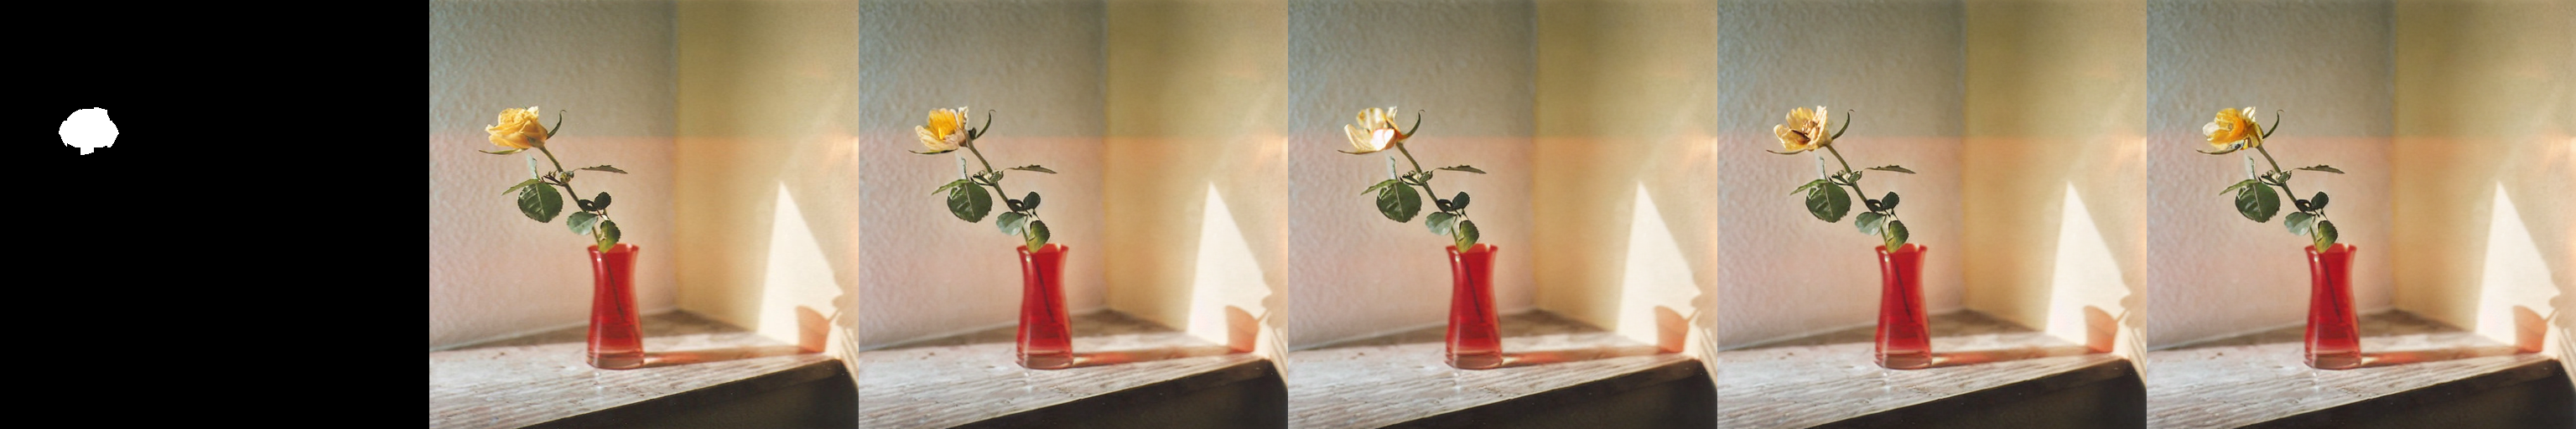

In [ ]:
num_samples = 4
images = inpainting(outmasks[11], org_image[11], paint_promot[11][1])
image_grid(images, 1, num_samples + 2)

In [45]:
num_samples = 4
images = inpainting(outmasks[11], org_image[11], paint_promot[11][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[12]

['a monkey',
 'a monkey opening the doors',
 'a monkey opening the doors from a bathroom']

In [ ]:
#original prompts
prompts[12]

'woman'

In [44]:
num_samples = 4
images = inpainting(outmasks[12], org_image[12], paint_promot[12][0])
image_grid(images, 1, num_samples + 2)

In [46]:
num_samples = 4
images = inpainting(outmasks[12], org_image[12], paint_promot[12][1])
image_grid(images, 1, num_samples + 2)

In [47]:
num_samples = 4
images = inpainting(outmasks[12], org_image[12], paint_promot[12][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[13]

['A apple', 'a vase of apple', 'a vase of apple on a wood table']

In [ ]:
#original prompts
prompts[13]

'orange and purple tulip'

In [48]:
num_samples = 4
images = inpainting(outmasks[13], org_image[13], paint_promot[13][0])
image_grid(images, 1, num_samples + 2)

In [49]:
num_samples = 4
images = inpainting(outmasks[13], org_image[13], paint_promot[13][0])
image_grid(images, 1, num_samples + 2)

In [50]:
num_samples = 4
images = inpainting(outmasks[13], org_image[13], paint_promot[13][0])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[14]

['A suitacase',
 'a white suitacase',
 'a kitchen with a white suitacase oven sitting on top of a counter']

In [ ]:
#original prompts
prompts[14]

'white microwave'

In [51]:
num_samples = 4
images = inpainting(outmasks[14], org_image[14], paint_promot[14][0])
image_grid(images, 1, num_samples + 2)

In [52]:
num_samples = 4
images = inpainting(outmasks[14], org_image[14], paint_promot[14][1])
image_grid(images, 1, num_samples + 2)

In [53]:
num_samples = 4
images = inpainting(outmasks[14], org_image[14], paint_promot[14][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[15]

['A tv', 'a small tv', 'a tv on top of a stove']

In [ ]:
#original prompts
prompts[15]

'microwave oven'

In [54]:
num_samples = 4
images = inpainting(outmasks[15], org_image[15], paint_promot[15][0])
image_grid(images, 1, num_samples + 2)

In [55]:
num_samples = 4
images = inpainting(outmasks[15], org_image[15], paint_promot[15][1])
image_grid(images, 1, num_samples + 2)

In [56]:
num_samples = 4
images = inpainting(outmasks[15], org_image[15], paint_promot[15][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[16]

['a bowl of soup',
 'a bowl of soup sitting on a plate',
 'a bowl of soup sitting on a plate with omelette and spoon near a basket of crackers']

In [ ]:
#original prompts
prompts[16]

'sandwich'

In [57]:
num_samples = 4
images = inpainting(outmasks[16], org_image[16], paint_promot[16][0])
image_grid(images, 1, num_samples + 2)

In [58]:
num_samples = 4
images = inpainting(outmasks[16], org_image[16], paint_promot[16][1])
image_grid(images, 1, num_samples + 2)

In [59]:
num_samples = 4
images = inpainting(outmasks[16], org_image[16], paint_promot[16][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[17]

['A cabybara',
 'a gray capybara',
 'a gray cabybara lying on a carpet in a room']

In [ ]:
#original prompts
prompts[17]

'cat'

In [60]:
num_samples = 4
images = inpainting(outmasks[17], org_image[17], paint_promot[17][0])
image_grid(images, 1, num_samples + 2)

In [61]:
num_samples = 4
images = inpainting(outmasks[17], org_image[17], paint_promot[17][1])
image_grid(images, 1, num_samples + 2)

In [62]:
num_samples = 4
images = inpainting(outmasks[17], org_image[17], paint_promot[17][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[18]

['A bagel', 'two bagels', 'two bagels next to three oranges on a white plate']

In [ ]:
#original prompts
prompts[18]

'strawberries'

In [63]:
num_samples = 4
images = inpainting(outmasks[18], org_image[18], paint_promot[18][0])
image_grid(images, 1, num_samples + 2)

In [64]:
num_samples = 4
images = inpainting(outmasks[18], org_image[18], paint_promot[18][1])
image_grid(images, 1, num_samples + 2)

In [65]:
num_samples = 4
images = inpainting(outmasks[18], org_image[18], paint_promot[18][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[19]

['Cookies',
 'a couple of cookies',
 'a couple of cookies sitting on a blue plate on a computer desk']

In [ ]:
#original prompts
prompts[19]

'hot dog'

In [66]:
num_samples = 4
images = inpainting(outmasks[19], org_image[19], paint_promot[19][0])
image_grid(images, 1, num_samples + 2)

In [67]:
num_samples = 4
images = inpainting(outmasks[19], org_image[19], paint_promot[19][1])
image_grid(images, 1, num_samples + 2)

In [68]:
num_samples = 4
images = inpainting(outmasks[19], org_image[19], paint_promot[19][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[20]

['A dog', 'a huge husky', 'a dog sits on a small bed in a small room']

In [ ]:
#original prompts
prompts[20]

'backpack'

In [69]:
num_samples = 4
images = inpainting(outmasks[20], org_image[20], paint_promot[20][0])
image_grid(images, 1, num_samples + 2)

In [70]:
num_samples = 4
images = inpainting(outmasks[20], org_image[20], paint_promot[20][1])
image_grid(images, 1, num_samples + 2)

In [71]:
num_samples = 4
images = inpainting(outmasks[20], org_image[20], paint_promot[20][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[21]

['A pool', 'a pool is on the floor', 'a pool is on the floor on wooden slats']

In [ ]:
#original prompts
prompts[21]

'bed'

In [72]:
num_samples = 4
images = inpainting(outmasks[21], org_image[21], paint_promot[21][0])
image_grid(images, 1, num_samples + 2)

In [73]:
num_samples = 4
images = inpainting(outmasks[21], org_image[21], paint_promot[21][1])
image_grid(images, 1, num_samples + 2)

In [74]:
num_samples = 4
images = inpainting(outmasks[21], org_image[21], paint_promot[21][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[22]

['books',
 'a stack of books',
 'there is a stack of books laid out in front of a couch']

In [ ]:
#original prompts
prompts[22]

'suitcase'

In [75]:
num_samples = 4
images = inpainting(outmasks[22], org_image[22], paint_promot[22][0])
image_grid(images, 1, num_samples + 2)

In [76]:
num_samples = 4
images = inpainting(outmasks[22], org_image[22], paint_promot[22][1])
image_grid(images, 1, num_samples + 2)

In [77]:
num_samples = 4
images = inpainting(outmasks[22], org_image[22], paint_promot[22][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[23]

['Floor', 'wood floor', 'a white wood floor']

In [ ]:
#original prompts
prompts[23]

'carpet'

In [78]:
num_samples = 4
images = inpainting(outmasks[23], org_image[23], paint_promot[23][0])
image_grid(images, 1, num_samples + 2)

In [79]:
num_samples = 4
images = inpainting(outmasks[23], org_image[23], paint_promot[23][1])
image_grid(images, 1, num_samples + 2)

In [80]:
num_samples = 4
images = inpainting(outmasks[23], org_image[23], paint_promot[23][2])
image_grid(images, 1, num_samples + 2)

In [ ]:
#replacement promots
paint_promot[24]

['A laptop',
 'a laptop sitting on a pile of rocks',
 'a laptop sitting on a pile of rocks next to a remote control']

In [ ]:
#original prompts
prompts[24]

'couch'

In [81]:
num_samples = 4
images = inpainting(outmasks[24], org_image[24], paint_promot[24][0])
image_grid(images, 1, num_samples + 2)

In [82]:
num_samples = 4
images = inpainting(outmasks[24], org_image[24], paint_promot[24][1])
image_grid(images, 1, num_samples + 2)

In [83]:
num_samples = 4
images = inpainting(outmasks[24], org_image[24], paint_promot[24][2])
image_grid(images, 1, num_samples + 2)